<a href="https://colab.research.google.com/github/nistrate/tensorflow_notes/blob/master/Code_Prep_Regression_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Theory

- recap the steps
1) load in the data ($X$ and $Y$) - may involve transforming data
2) instantiate the model
3) train ("fit") the model
4) evaluate the model

LRT
 - 1 input
 $$
 \hat{y} = m x +b ~~~ {\text{ or }} ~~~(ax+b)
 $$

 - multiple inputs
$$
\hat{y} = \sum_{d=1}^{D} w_{d}x_{d} +b  = w^{T}x + b
$$

Stochastic Gradient Descent


```
model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9) , loss= 'mse')
```
The optimizer is not ```adam``` but ```SGD``` which stands for Stochastic Gradient Descent

Learning Rate Scheuling
- modify your learning rate based on the epoch number

For the ```loss``` we chose here is the mean square error ```mse```
$$
MSE = \frac{1}{N}\sum_{i=1}^{N} (y_{i} - \hat{y}_i)^2
$$




EXPONENTIAL GROWTH

$$
C = A_{0}r^t
$$

- $C$ - count (output variable)
- $A_0$ - initial value of $C$ at $t= 0$
- t - time (input variable, year in our case)
- r - rate of growth

Notice that this is not a linear problem.

We can make it linear if we take the $\log$ of the equation above

$$
\log [C] = \log [r]t + \log [A_0]  
$$


Veryfying Moore's Law

In [28]:
#!pip install -q tensorflow = 2.0.0
import tensorflow as tf
print(tf.__version__)

2.2.0


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-07-13 21:58:20--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-07-13 21:58:20 (36.5 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [31]:
data = pd.read_csv('moore.csv', header = None).values
X = data[:,0].reshape(-1,1) # make it a 2D array of size N x D where D = 1
Y = data[:,1]

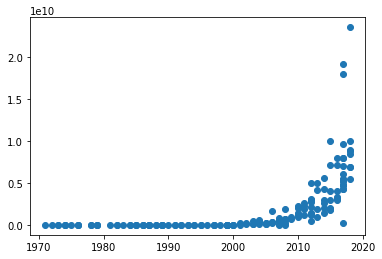

In [32]:
plt.scatter(X,Y) #notice the exponenetial trend of the data

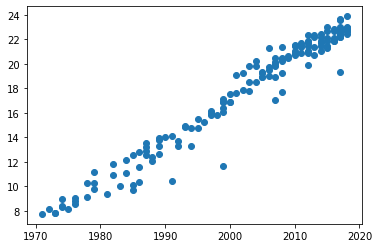

In [33]:
Y = np.log(Y)
plt.scatter(X,Y)

In [34]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverese the transformation later

X = X - X.mean()


In [35]:
# Now let's create the tensorflow model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape = (1,)),
                                    tf.keras.layers.Dense(1)
])

model.compile (optimizer= tf.keras.optimizers.SGD(0.001, 0.9), loss= 'mse')
#model.compile(optimizer = 'adam', loss = 'mse')

#learning rate scheduler

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the network

r = model.fit(X,Y, epochs = 200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 380.7790 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 310.9095 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 276.9032 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 277.4092 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 210.8551 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 136.4829 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 97.0689 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 66.4529 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 71.7274 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 74.3770 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 4

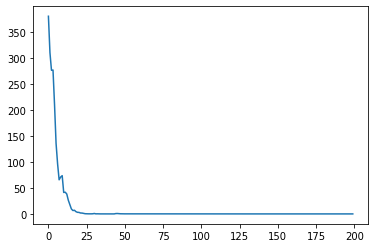

In [36]:
plt.plot(r.history['loss'], label = 'loss')

In [37]:
#get the slope of the line
# The slope of the line is related to the doubling rate of the transistor count

print(model.layers) # Note: there's only 1 layer, the input layer doesn't count
print(model.layers[0].get_weights())

[array([[0.3358393]], dtype=float32), array([17.770462], dtype=float32)]


In [38]:
# The slope of the line is (weights)

a = model.layers[0].get_weights()[0][0,0]
print(a)
print(np.exp(a))

0.3358393
1.3991141


The poriginal exponential gowth:

$$
C = A_0 r^t
$$

linearize
$$
\log [C] = \log[r]t + \log[A_0]
$$

which is our linear equation
$$
\hat{y} = a x + b
$$
hence:
$$
\hat{y} = \log[C] \\
a = \log[r] \\
x = t \\
b = \log[A_{0}]
$$

we are interesird in $r$, since it represeents the rate of growth.Given our regression weights, we know that
$$
a = 0.34564033
$$
which mean that $r = e^{0.34564033} = 1.4128944$.

To find the time it takles for a transitor count to double , we simply need to set $C = 2A_{0}$ whcih implies that
\begin{align*}
2 A_{0} &= A_{0} r^{t}\\
2 &= r^{t}\\
t &= \frac{\log [2]}{a}\\
t &= 2.0054
\end{align*}

which is the prediction of Moore's Law, the transition number doubles each two years.

In [39]:
# if we want to now the analytical solution

X = np.array(X).flatten()
Y = np.array(Y)

denominator = X.dot(X) - X.mean()*X.sum()

a = ( np.dot(X, Y) - Y.mean()*X.sum() )/denominator
b = (Y.mean()*np.dot(X,X) - X.mean()*np.dot(X,Y) ) / denominator
print(a,b)
print('Time to double  = ', np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double  =  2.0286295205239204


Pasrt 2: Making Predictions

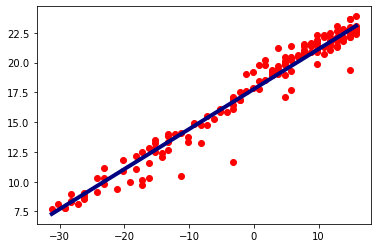

In [46]:
# Make sure that the calculateed line fits our data

Yhat = model.predict(X).flatten()
plt.scatter(X,Y, color ="red")
plt.plot(X,Yhat, linewidth = "4", color = 'navy')

In [49]:
# Manual calculation

# get the weights

w,b = model.layers[0].get_weights()

#Reshape X because we flattened it again earlier

X = X.reshape(-1,1)

# (N x 1) x (1 x 1) + (1) ---> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for teh floating points
np.allclose(Yhat, Yhat2)

True

PART 3: Saving and Loading a Model

In [50]:
# Let's save our model to a file

model.save('lineclassifier.h5')

In [51]:
# check if file is stored locally
!ls -lh

total 36K
-rw-r--r-- 1 root root  18K Jul 13 22:15 lineclassifier.h5
-rw-r--r-- 1 root root 2.3K Jul 13 21:34 moore.csv
-rw-r--r-- 1 root root 2.3K Jul 13 21:40 moore.csv.1
-rw-r--r-- 1 root root 2.3K Jul 13 21:58 moore.csv.2
drwxr-xr-x 1 root root 4.0K Jul 10 16:29 sample_data


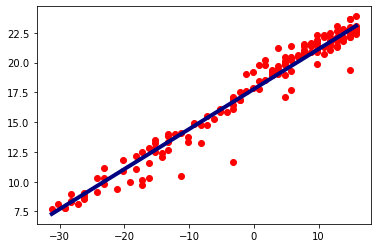

In [52]:
# Let's load the model and confirm that it still works
# Nodet: there's a bug un Keras where load/save only works if you DON"T use Input() layer explicitly
# So make sure you define the mdeol with only Dense(1, input_shape = (D,))
# At least until the bug is fixed - it is fixed
# https://github.com/keras-team/keras/issues/10417

model = tf.keras.models.load_model('lineclassifier.h5')
print(model.layers)

Yhat_loaded = model.predict(X).flatten()
plt.scatter(X,Y, color ="red")
plt.plot(X,Yhat_loaded, linewidth = "4", color = 'navy')